En este experimento correremos el mejor par de hiperparametros para kNN+PCA con distintos tamanios de dataset. Primero corremos un script para el build de las librerias de c++ como modulos de python. Analizaremos con mas profunidad estos resultados en el informe dado junto a esta entrega.

In [ ]:
!sh build.sh

Importamos dependencias

In [25]:
import metnum
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
from pathlib import Path
import time
from utils import get_MNIST_XY
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

Obtenemos los X e y de MNIST, shuffleados con 70000 elementos.

In [26]:
X_all, y_all = get_MNIST_XY(0.8, 70000)

Seteamos los tamanios de dataset a probar

In [27]:
cant_imagenes = [100, 500, 1000, 5000, 10000, 20000, 50000, 70000]

In [28]:
resultados = []
for j, cant in enumerate(cant_imagenes):
    y = y_all.astype(int)[:cant]
    X = X_all.astype(int)[:cant]

    kf = KFold(n_splits=5, shuffle=True)
    accuracies_by_split = 0
    for train_index, test_index in kf.split(X):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        pca = metnum.PCA(19)
        pca.fit(X_train)
        X_train_PCA = pca.transform(X_train)

        X_val_PCA = pca.transform(X_val)

        clf_metnum = metnum.KNNClassifier(3)
        clf_metnum.fit(X_train_PCA, y_train)
        acc = accuracy_score(clf_metnum.predict(X_val_PCA), y_val)
        accuracies_by_split += acc

    resultados.append(accuracies_by_split / 5)

In [29]:
resultados

[0.7100000000000001,
 0.8460000000000001,
 0.8940000000000001,
 0.9308,
 0.9436,
 0.9553499999999999,
 0.9666599999999999,
 0.9703714285714286]

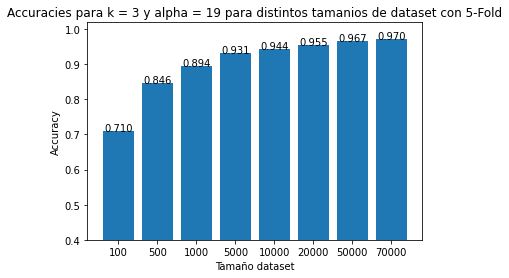

In [31]:
plt.bar(['100', '500', '1000', '5000', '10000', '20000', '50000', '70000'], resultados)
plt.ylim(0.4)
plt.ylabel('Accuracy')
plt.xlabel('Tamaño dataset')
plt.title(f'Accuracies para k = 3 y alpha = 19 para distintos tamanios de dataset con 5-Fold')
for i in range(8):
    plt.text(i, resultados[i], format(resultados[i], '.3f') , ha = 'center')
plt.show()